<a href="https://colab.research.google.com/github/vivekswamy021/file_renaming/blob/main/Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Classification Model by using MobileNet V2 from TensorFlow Hub**

#**Downloading mobilenet_v2 classifier**

In [1]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

#**Create an instance of MobileNetV2 model**

In [2]:
classifier_model = mobilenet_v2

#**Import Libraries**

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import numpy as np
import matplotlib.pylab as plt


##**Wrap classifier model as Keras layer with hub.KerasLayer**

In [4]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x : hub.KerasLayer(classifier_model)(x), input_shape=IMAGE_SHAPE + (3,),trainable=False)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
import tensorflow as tf
print(tf.__version__)


2.18.0


#**Load or Open image**

In [6]:
from google.colab import files
uploaded = files.upload()

Saving AI.jpg to AI.jpg


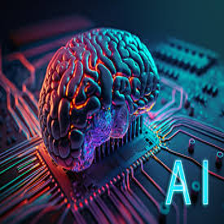

In [7]:
ai = 'AI.jpg'
ai = Image.open(ai).resize(IMAGE_SHAPE)
ai

#**Rescale image**

In [8]:
ai = np.array(ai)/255.0           ## Converting the PIL Image to a NumPy array and divide it by 255.0 for scaling
ai.shape                                           # access the shape


(224, 224, 3)

In [9]:
ai

array([[[0.02745098, 0.02745098, 0.05882353],
        [0.02745098, 0.02745098, 0.05882353],
        [0.02745098, 0.02745098, 0.05882353],
        ...,
        [0.05882353, 0.24313725, 0.28235294],
        [0.05882353, 0.24313725, 0.28235294],
        [0.05882353, 0.24313725, 0.28235294]],

       [[0.02745098, 0.02745098, 0.05882353],
        [0.02745098, 0.02745098, 0.05882353],
        [0.02745098, 0.02745098, 0.05882353],
        ...,
        [0.05882353, 0.24313725, 0.28235294],
        [0.05882353, 0.24313725, 0.28235294],
        [0.05882353, 0.24313725, 0.28235294]],

       [[0.02745098, 0.02745098, 0.05882353],
        [0.02745098, 0.02745098, 0.05882353],
        [0.02745098, 0.02745098, 0.05882353],
        ...,
        [0.05882353, 0.24313725, 0.28235294],
        [0.05882353, 0.24313725, 0.28235294],
        [0.05882353, 0.24313725, 0.28235294]],

       ...,

       [[0.16470588, 0.08627451, 0.11372549],
        [0.15294118, 0.09411765, 0.1254902 ],
        [0.11764706, 0

#**Add a batch dimension with np.newaxis**

In [10]:
ai_expended_dim = ai[np.newaxis, ...]
ai_expended_dim.shape

(1, 224, 224, 3)

#**Predict**

In [11]:
result = classifier.predict(ai_expended_dim)
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(1, 1001)

- The result is a 1001-element vector of logits, rating the probability of each class for the image.

#**top class ID**

This ID is often used to retrieve the corresponding human-readable label from a class index file, like the ImageNetLabels.tx

In [12]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=110>

In [13]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
labels_path

10484/10484 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

In [14]:
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

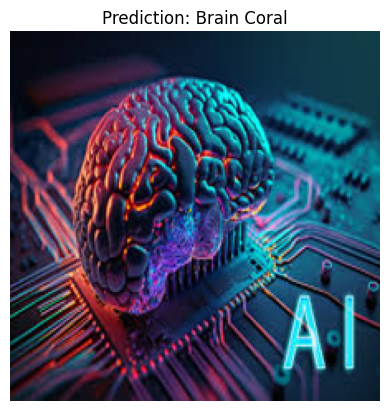

In [15]:
plt.imshow(ai)
predicted_class_name = imagenet_labels[predicted_class]
plt.title("Prediction: " + predicted_class_name.title())
plt.axis("off")
plt.show()